<a href="https://colab.research.google.com/github/hanansuk/guns_n_roses/blob/main/rand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages('lmtest')
install.packages('sandwich')
install.packages('stargazer')
install.packages('corrplot')
install.packages('plotly')
install.packages('googledrive')
install.packages('httpuv')
install.packages('reshape2')
install.packages('ggrepel')
install.packages('wordcloud')
install.packages('RColorBrewer')
install.packages('wordcloud2')
install.packages('tm')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘later’, ‘htmlwidgets’, ‘lazyeval’, ‘crosstalk’, ‘promises’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘plyr’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [25]:
library(ggplot2)
library(dplyr)
library(tidyr)
library(stringr)
library(sandwich)
library(lmtest)
library(stargazer)
library(cli)
library(corrplot)
library(scales)
library(tidyverse)
library(stats)
# library(plotly)
library(ggrepel)
library(reshape2)
library(googledrive) 
library(httpuv)
library(repr)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)s

In [3]:
if (file.exists("/usr/local/lib/python3.7/dist-packages/google/colab/_ipython.py")) { #may update python version  
                                       #occasionally
  install.packages("R.utils")
  library("R.utils")
  library("httr")
  my_check <- function() {return(TRUE)}
  reassignInPackage("is_interactive", pkgName = "httr", my_check) 
  options(rlang_interactive=TRUE)
}

In [4]:
lagpad <- function(x, k) {
  if (k>0 & (k %% 5 != 0)) {
    return (c(rep(NA, k), x)[1 : length(x)] );
  }
  else {
    return (c(x[(-k+1) : length(x)], rep(NA, -k)));
  }
}

In [7]:
x <- drive_get("~/RAND.csv")
drive_download(x, overwrite = TRUE)
rand <- read.csv("/content/RAND.csv", header = TRUE)

✔ The input `path` resolved to exactly 1 file.

File downloaded:

• RAND.csv <id: 17cFjR8o1RTNhrqJJ9EBVRKSb2b2PrWoy>

Saved locally as:

• RAND.csv



In [9]:
summary(rand)

    Law.ID             State           State.Postal.Abbreviation
 Length:2742        Length:2742        Length:2742              
 Class :character   Class :character   Class :character         
 Mode  :character   Mode  :character   Mode  :character         
                                                                
                                                                
                                                                
                                                                
   FIPS.Code     Law.Class..num.   Law.Class         Law.Class.Subtype 
 Min.   : 1.00   Min.   : 1.000   Length:2742        Length:2742       
 1st Qu.:15.00   1st Qu.: 4.000   Class :character   Class :character  
 Median :28.00   Median : 8.000   Mode  :character   Mode  :character  
 Mean   :28.24   Mean   : 8.114                                        
 3rd Qu.:41.00   3rd Qu.:12.000                                        
 Max.   :56.00   Max.   :19.000                 

In [8]:
glimpse(rand)
head(rand)

Rows: 2,742
Columns: 27
$ Law.ID                                        <chr> "AK1001", "AK1002", "AK1…
$ State                                         <chr> "Alaska", "Alaska", "Ala…
$ State.Postal.Abbreviation                     <chr> "AK", "AK", "AK", "AK", …
$ FIPS.Code                                     <int> 2, 2, 2, 2, 2, 2, 2, 2, …
$ Law.Class..num.                               <int> 1, 2, 2, 2, 3, 3, 4, 5, …
$ Law.Class                                     <chr> "background checks", "ca…
$ Law.Class.Subtype                             <chr> "private sales", "prohib…
$ Handguns.or.Long.Guns                         <chr> "handgun", "handgun", "h…
$ Effect                                        <chr> "", "Restrictive", "Perm…
$ Type.of.Change                                <chr> "", "Implement", "Modify…
$ Effective.Date                                <chr> "", "1978-01-01", "1994-…
$ Effective.Date.Note                           <chr> "", "See additional note…
$ Effective.Date

,Law.ID,State,State.Postal.Abbreviation,FIPS.Code,Law.Class..num.,Law.Class,Law.Class.Subtype,Handguns.or.Long.Guns,Effect,Type.of.Change,⋯,Supersession.Date,Supersession.Date.Year,Supersession.Date.Month,Supersession.Date.Day,Controlling.Law.at.Beginning.of.Period..1979.,Age.for.Minimum.Age.Laws,Length.of.Waiting.Period..days..handguns.,Additional.Context.and.Notes,Caveats.and.Ambiguities,Exception.Code
,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,AK1001,Alaska,AK,2,1,background checks,private sales,handgun,,,⋯,,NA,NA,NA,1,,,,,
2,AK1002,Alaska,AK,2,2,carrying a concealed weapon (ccw),prohibited,handgun,Restrictive,Implement,⋯,1994-10-01,1994,10,1,1,,,"Prior law prohibiting concealed carry enacted before 1966. Carl Bakal, ""The Right to Bear Arms."". Replaced by § 11.61.220 in 1978, which says ""a person commits the crime of misconduct involving weapons in the third degree if he‚…knowingly possesses a deadly weapon other than an ordinary pocket knife, that is concealed on his person.",,
3,AK1003,Alaska,AK,2,2,carrying a concealed weapon (ccw),shall issue,handgun,Permissive,Modify,⋯,2003-09-09,2003,9,9,,,,,,
4,AK1004,Alaska,AK,2,2,carrying a concealed weapon (ccw),shall issue (permit not required),handgun,Permissive,Modify,⋯,,NA,NA,NA,,,,"Permitting system maintained for residents seeking reciprocity with other states or ""those who seek to be exempt from background checks when purchasing additional firearms"" (""Concealed Weapons Permitting,"" Giffords Law Center to Prevent Gun Violence, undated).",,
5,AK1005,Alaska,AK,2,3,castle doctrine,,handgun and/or long gun,Permissive,Modify,⋯,2006-09-13,2006,9,13,1,,,See 2006 S.B. No. 200 Ch. 68.,,
6,AK1006,Alaska,AK,2,3,castle doctrine,expanded 2,handgun and/or long gun,Permissive,Modify,⋯,2013-09-18,2013,9,18,,,,,Catagorized as expanded 2 because removes duty to retreat in instances where a person is a guest at a residence,


In [78]:
rand_corpus_restrictive <- rand %>%
  filter(tolower(Effect) == 'restrictive')
rand_corpus_restrictive$Content = removeWords(rand_corpus_restrictive$Content, stopwords("english"))
rand_corpus_restrictive$Content = stripWhitespace(rand_corpus_restrictive$Content)
rand_corpus_restrictive <- Corpus(VectorSource(as.vector(rand_corpus_restrictive$Content)))
rand_corpus_restrictive

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 1071

In [79]:
rand_corpus_permissive <- rand %>%
  filter(tolower(Effect) == 'permissive')
rand_corpus_permissive$Content = removeWords(rand_corpus_permissive$Content, stopwords("english"))
rand_corpus_permissive$Content = stripWhitespace(rand_corpus_permissive$Content)
rand_corpus_permissive <- Corpus(VectorSource(as.vector(rand_corpus_permissive$Content)))
rand_corpus_permissive

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 377

In [80]:
rand_wc_permissive <-  rand_corpus_permissive %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
rand_wc_permissive <- tm_map(rand_wc_permissive, content_transformer(tolower))
rand_wc_permissive <- tm_map(rand_wc_permissive, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_permissive, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_permissive, removeWords, stopwords("english")):
“transformation drops documents”


In [81]:
rand_wc_restrictive <-  rand_corpus_restrictive %>%
  tm_map(removeNumbers) %>%
  tm_map(removePunctuation) %>%
  tm_map(stripWhitespace)
rand_wc_restrictive <- tm_map(rand_wc_restrictive, content_transformer(tolower))
rand_wc_restrictive <- tm_map(rand_wc_restrictive, removeWords, stopwords("english"))

Warning message in tm_map.SimpleCorpus(., removeNumbers):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., removePunctuation):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(., stripWhitespace):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_restrictive, content_transformer(tolower)):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(rand_wc_restrictive, removeWords, stopwords("english")):
“transformation drops documents”


In [82]:
dtm <- TermDocumentMatrix(rand_wc_restrictive) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
df_restrictive <- data.frame(word = names(words),freq=words) %>% filter(!(word %in% c('person', 'shall', 'the')))

dtm <- TermDocumentMatrix(rand_wc_permissive) 
matrix <- as.matrix(dtm) 
words <- sort(rowSums(matrix),decreasing=TRUE) 
df_permissive <- data.frame(word = names(words),freq=words) %>% filter(!(word %in% c('person', 'shall', 'the')))

In [83]:
df_restrictive

,word,freq
,<chr>,<dbl>
firearm,firearm,1836
section,section,1289
law,law,938
licensed,licensed,859
state,state,829
transferee,transferee,784
officer,officer,665
firearms,firearms,650
transfer,transfer,629


In [84]:
df_permissive

,word,freq
,<chr>,<dbl>
state,state,210
force,force,204
law,law,184
section,section,182
carry,carry,176
permit,permit,160
concealed,concealed,155
license,license,149
firearm,firearm,147


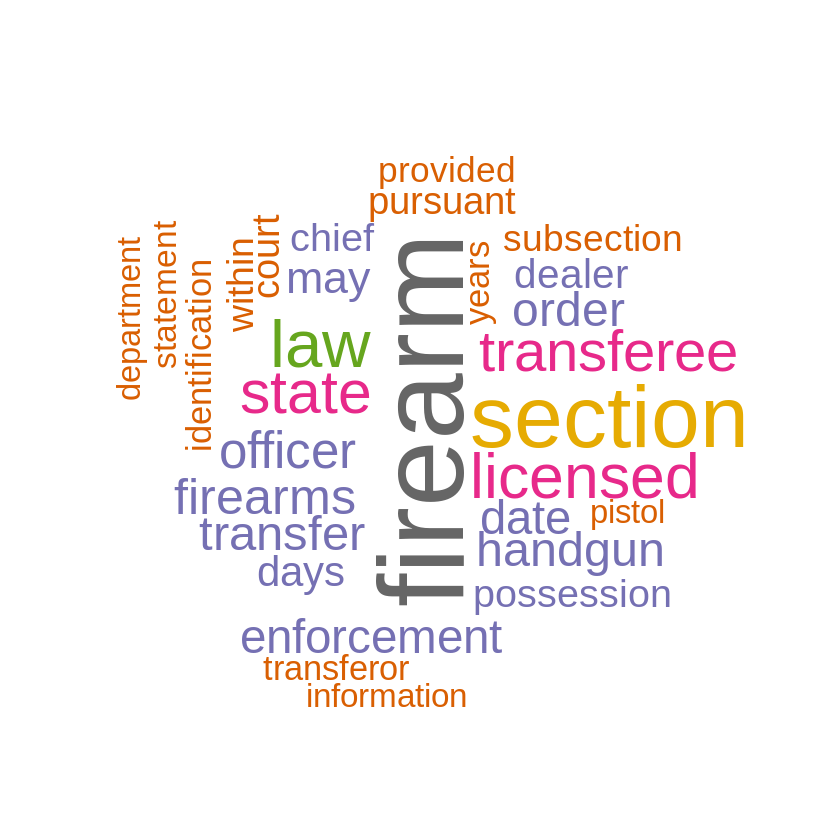

In [110]:
set.seed(1234) # for reproducibility 
wordcloud(words = df_restrictive$word, freq = df_restrictive$freq, min.freq = 5,           max.words=30, random.order=FALSE, rot.per=0.35,            colors=brewer.pal(8, "Dark2"), scale=c(6,0.6))

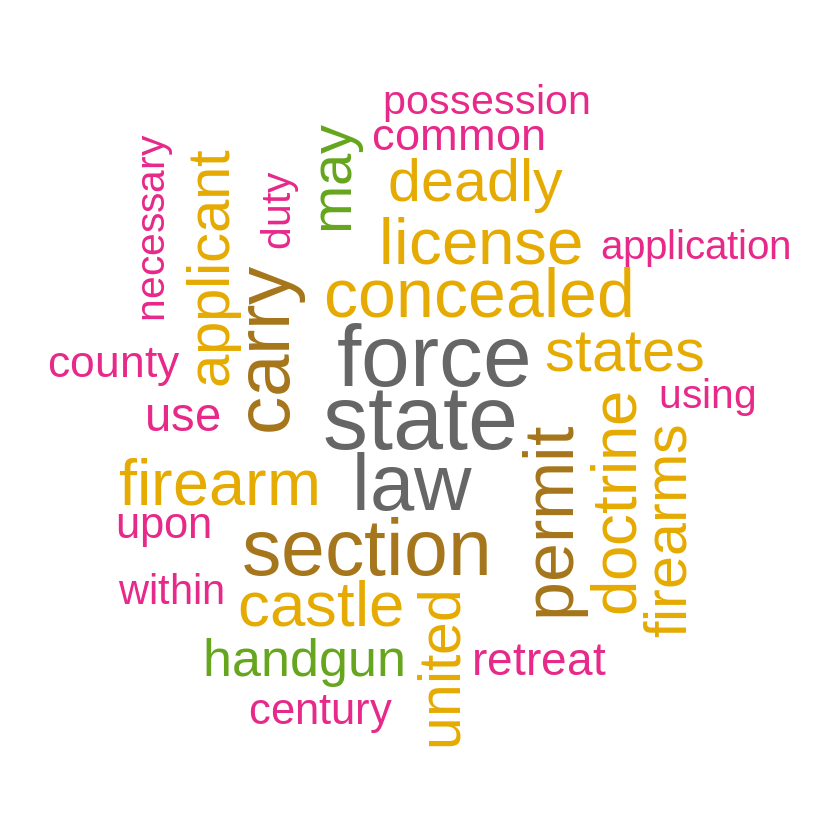

In [111]:
set.seed(2345) # for reproducibility 
wordcloud(words = df_permissive$word, freq = df_permissive$freq, min.freq = 3,           max.words=30, random.order=FALSE, rot.per=0.35,            colors=brewer.pal(8, "Dark2"), scale=c(4.5,0.3))

In [112]:
## final export
write.csv(rand, "RAND.csv", row.names=FALSE)